# **Analyse der großen Veränderungen**

*Große QTTR-Veränderungen und deren Ursache Fabian*

---

In [2]:
#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-#-#-# Librarys #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
########################################################
#--------------------- Import Data --------------------#
########################################################

TTR_Entwicklung_inport = pd.read_csv("/Users/fabi/Documents/BBA/6_Semester/Projekt_BBA/QTTR-Veraenderungen-Klemm/Data/processed_data/TTR_Entwicklung_ohne_nall.csv")

TTR_Entwicklung_inport.head(10)

,InterneNr,Nachname,Vorname,Geschlecht,Geburtsdatum,Nation,TTR_Q1_2024,TTR_Q2_2024,TTR_Q3_2024,TTR_Q4_2024,TTR_Q1_2025,Q-TTR_dif_24_Q1-25_Q1,Q-TTR_dif_24_Q1-24_Q3,Q-TTR_dif_24_Q1-24_Q2,Q-TTR_dif_24_Q2-24_Q3,Q-TTR_dif_24_Q3-24_Q4,Q-TTR_dif_24_Q4-25_Q1
0,NU1461276,Trujillo,Hernan,M,1995-10-14,ARG,1867.0,1867.0,1910.0,1910.0,1910.0,43.0,43.0,0.0,43.0,0.0,0.0
1,NU1456059,Trujillo,Heylyn,W,1991-01-25,CUB,1766.0,1766.0,1767.0,1767.0,1767.0,1.0,1.0,0.0,1.0,0.0,0.0
2,NU1648225,Trujillo,Karoline,W,2002-09-27,GUA,1424.0,1424.0,1527.0,1527.0,1527.0,103.0,103.0,0.0,103.0,0.0,0.0
3,NU1464030,Trukhankina,Vasilisa,W,1997-10-07,RUS,1657.0,1657.0,1707.0,1707.0,1707.0,50.0,50.0,0.0,50.0,0.0,0.0
4,NU1460474,Truksova,Lucia,W,1995-08-22,SVK,1816.0,1816.0,1823.0,1823.0,1823.0,7.0,7.0,0.0,7.0,0.0,0.0
5,NU1459937,Trummler,Linus,M,1994-06-07,SUI,1693.0,1693.0,1705.0,1705.0,1705.0,12.0,12.0,0.0,12.0,0.0,0.0
6,NU2109041,Trungel,Mirella,W,2005-07-10,HUN,1559.0,1559.0,1667.0,1667.0,1667.0,108.0,108.0,0.0,108.0,0.0,0.0
7,NU1262891,Trunk,Michael,M,1998-11-10,GER,993.0,993.0,993.0,991.0,991.0,-2.0,0.0,0.0,0.0,-2.0,0.0
8,NU1650169,Trunk,Nico,M,2000-11-07,GER,860.0,860.0,860.0,859.0,859.0,-1.0,0.0,0.0,0.0,-1.0,0.0
9,NU1102325,Truong,Robinh,M,1998-08-09,GER,875.0,875.0,875.0,872.0,872.0,-3.0,0.0,0.0,0.0,-3.0,0.0


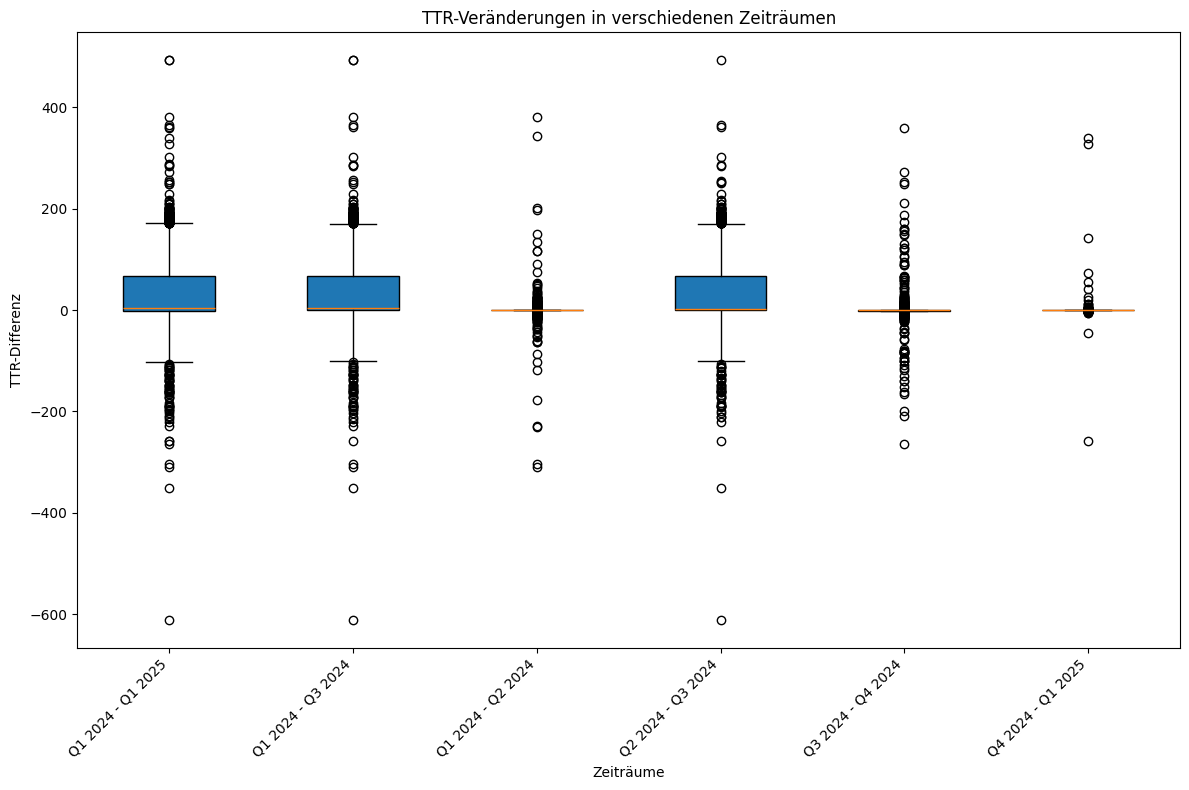

In [3]:
########################################################
#----------- Boxplot der QTTR Veränderungen -----------#
########################################################

# Spalten für den Boxplot
columns = [
    'Q-TTR_dif_24_Q1-25_Q1',
    'Q-TTR_dif_24_Q1-24_Q3',
    'Q-TTR_dif_24_Q1-24_Q2',
    'Q-TTR_dif_24_Q2-24_Q3',
    'Q-TTR_dif_24_Q3-24_Q4',
    'Q-TTR_dif_24_Q4-25_Q1'
]

# Beschriftungen für die Boxplots
labels = [
    'Q1 2024 - Q1 2025',
    'Q1 2024 - Q3 2024',
    'Q1 2024 - Q2 2024',
    'Q2 2024 - Q3 2024',
    'Q3 2024 - Q4 2024',
    'Q4 2024 - Q1 2025'
]

# Erstellen des Boxplots
plt.figure(figsize=(12, 8))
boxplot = plt.boxplot([TTR_Entwicklung_inport[col] for col in columns], 
                     patch_artist=True, 
                     vert=True,  # Vertikaler Boxplot
                     labels=labels)

# Achsenbeschriftungen
plt.xlabel('Zeiträume')
plt.ylabel('TTR-Differenz')
plt.title('TTR-Veränderungen in verschiedenen Zeiträumen')

# X-Achsenbeschriftungen drehen für bessere Lesbarkeit
plt.xticks(rotation=45, ha='right')

# Layout optimieren
plt.tight_layout()

# Anzeigen des Plots
plt.show()

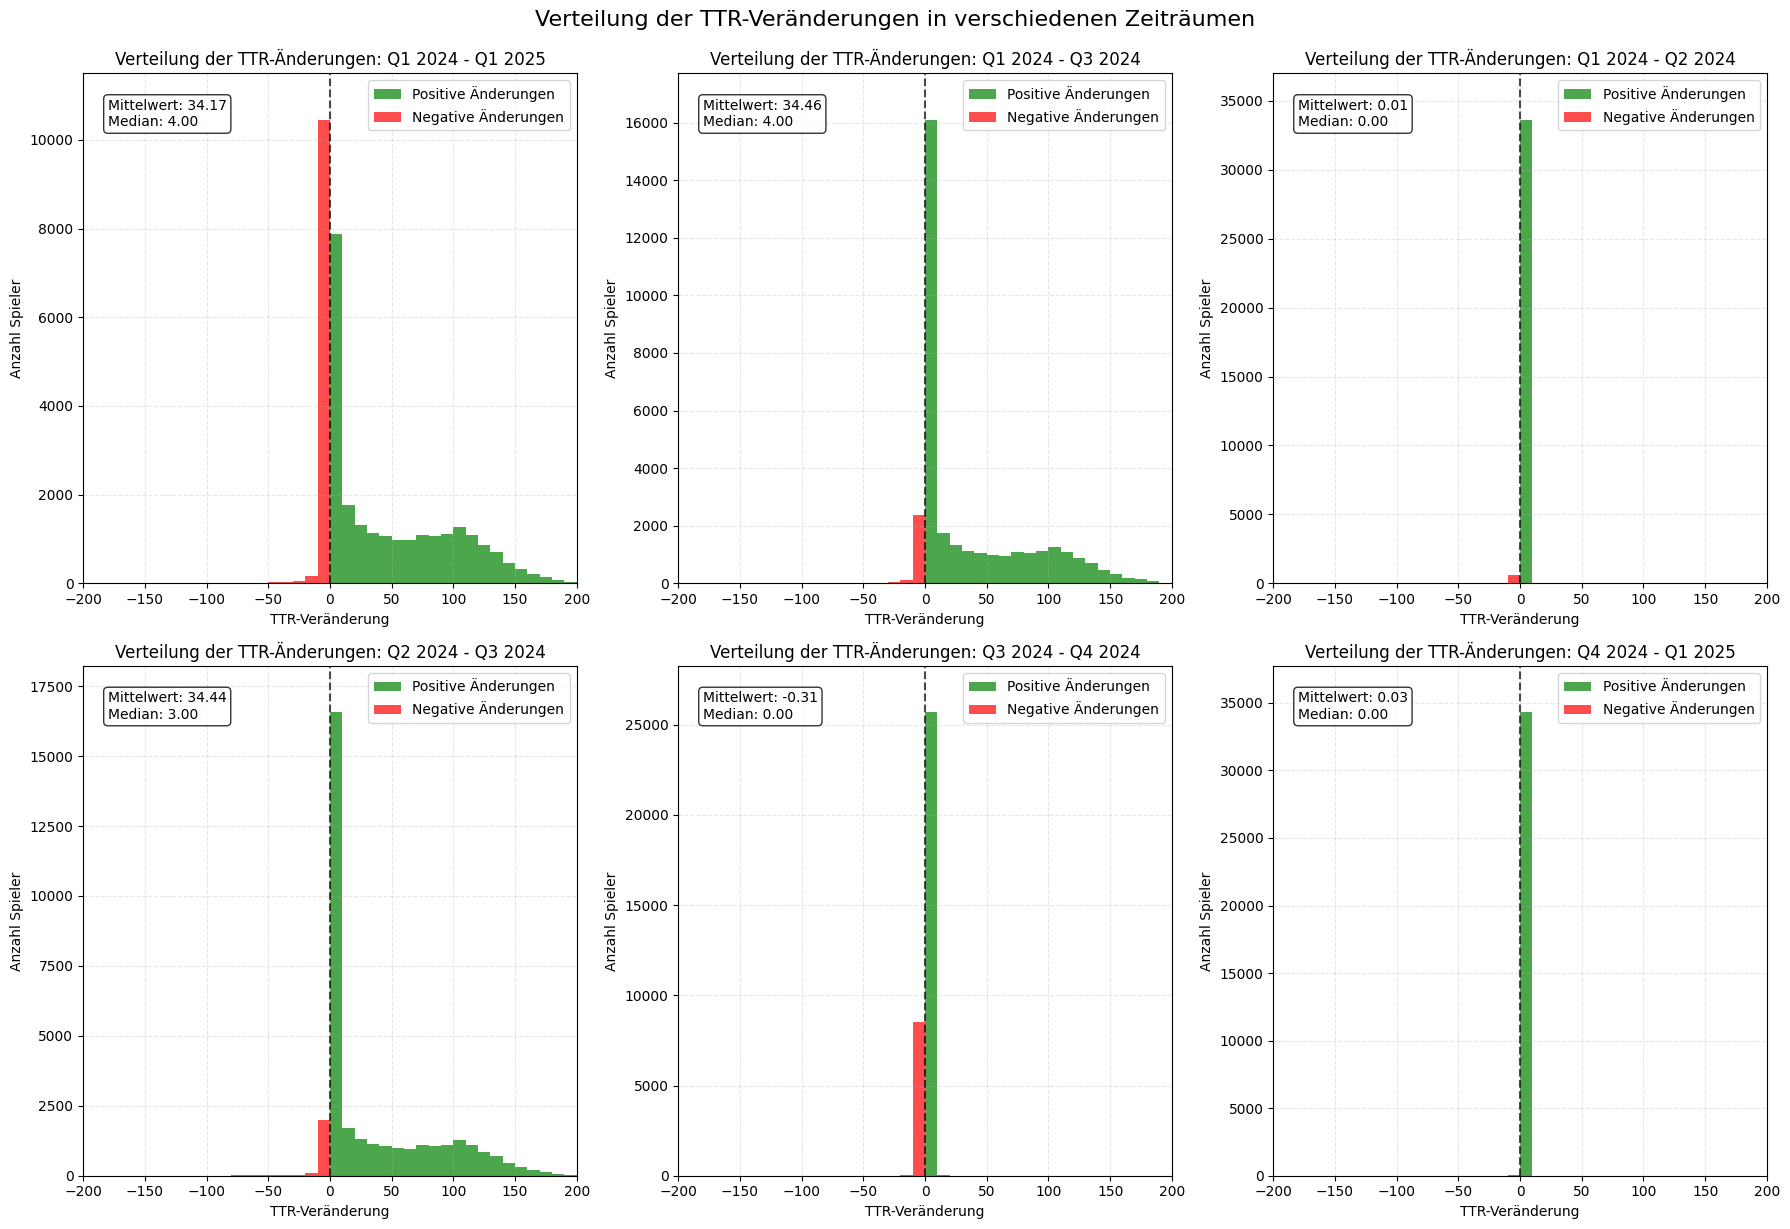

In [ ]:
########################################################
#---------- Barchart der QTTR Veränderungen -----------#
########################################################

# Erstellen einer Figur mit 6 Subplots (2 Zeilen, 3 Spalten)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Macht aus dem 2D-Array eine flache Liste

# Definition des Bins-Bereichs für alle Histogramme (für Konsistenz)
# Verwenden Sie einen breiteren Bereich, falls nötig
bins = np.arange(-200, 201, 10)  # Von -200 bis 200 in 10er-Schritten

# Farben für positive und negative Werte
pos_color = 'green'
neg_color = 'red'

# Für jede Spalte ein Histogramm erstellen
for i, (col, label) in enumerate(zip(columns, labels)):
    # Daten für dieses Histogramm
    data = TTR_Entwicklung_inport[col].dropna()
    
    # Aufteilen in positive und negative Werte für verschiedene Farben
    pos_data = data[data >= 0]
    neg_data = data[data < 0]
    
    # Histogramm für positive Werte (grün)
    axes[i].hist(pos_data, bins=bins, alpha=0.7, color=pos_color, label='Positive Änderungen')
    
    # Histogramm für negative Werte (rot)
    axes[i].hist(neg_data, bins=bins, alpha=0.7, color=neg_color, label='Negative Änderungen')
    
    # Vertikale Linie bei 0 hinzufügen
    axes[i].axvline(x=0, color='black', linestyle='--', alpha=0.7)
    
    # Beschriftungen hinzufügen
    axes[i].set_title(f'Verteilung der TTR-Änderungen: {label}')
    axes[i].set_xlabel('TTR-Veränderung')
    axes[i].set_ylabel('Anzahl Spieler')
    
    # Y-Achsen-Limit anpassen, um kleine Balken besser sichtbar zu machen
    max_count = max(np.histogram(pos_data, bins=bins)[0].max(), 
                   np.histogram(neg_data, bins=bins)[0].max())
    axes[i].set_ylim(0, max_count * 1.1)  # 10% Platz oben lassen
    
    # X-Achsen-Limit für bessere Vergleichbarkeit standardisieren
    axes[i].set_xlim(-200, 200)
    
    # Legende hinzufügen
    axes[i].legend()
    
    # Gitterlinien für bessere Lesbarkeit
    axes[i].grid(True, linestyle='--', alpha=0.3)
    
    # Beschriftungen für einige wichtige x-Werte
    axes[i].set_xticks([-200, -150, -100, -50, 0, 50, 100, 150, 200])
    
    # Statistik im Plot anzeigen
    mean_val = data.mean()
    median_val = data.median()
    axes[i].text(0.05, 0.95, f'Mittelwert: {mean_val:.2f}\nMedian: {median_val:.2f}',
                transform=axes[i].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Layout optimieren
plt.tight_layout()
plt.suptitle("Verteilung der TTR-Veränderungen in verschiedenen Zeiträumen", fontsize=16, y=1.02)

# Plot anzeigen
plt.show()

# Optional: Speichern der Grafik
# plt.savefig('ttr_veraenderungen_histogramme.png', dpi=300, bbox_inches='tight')

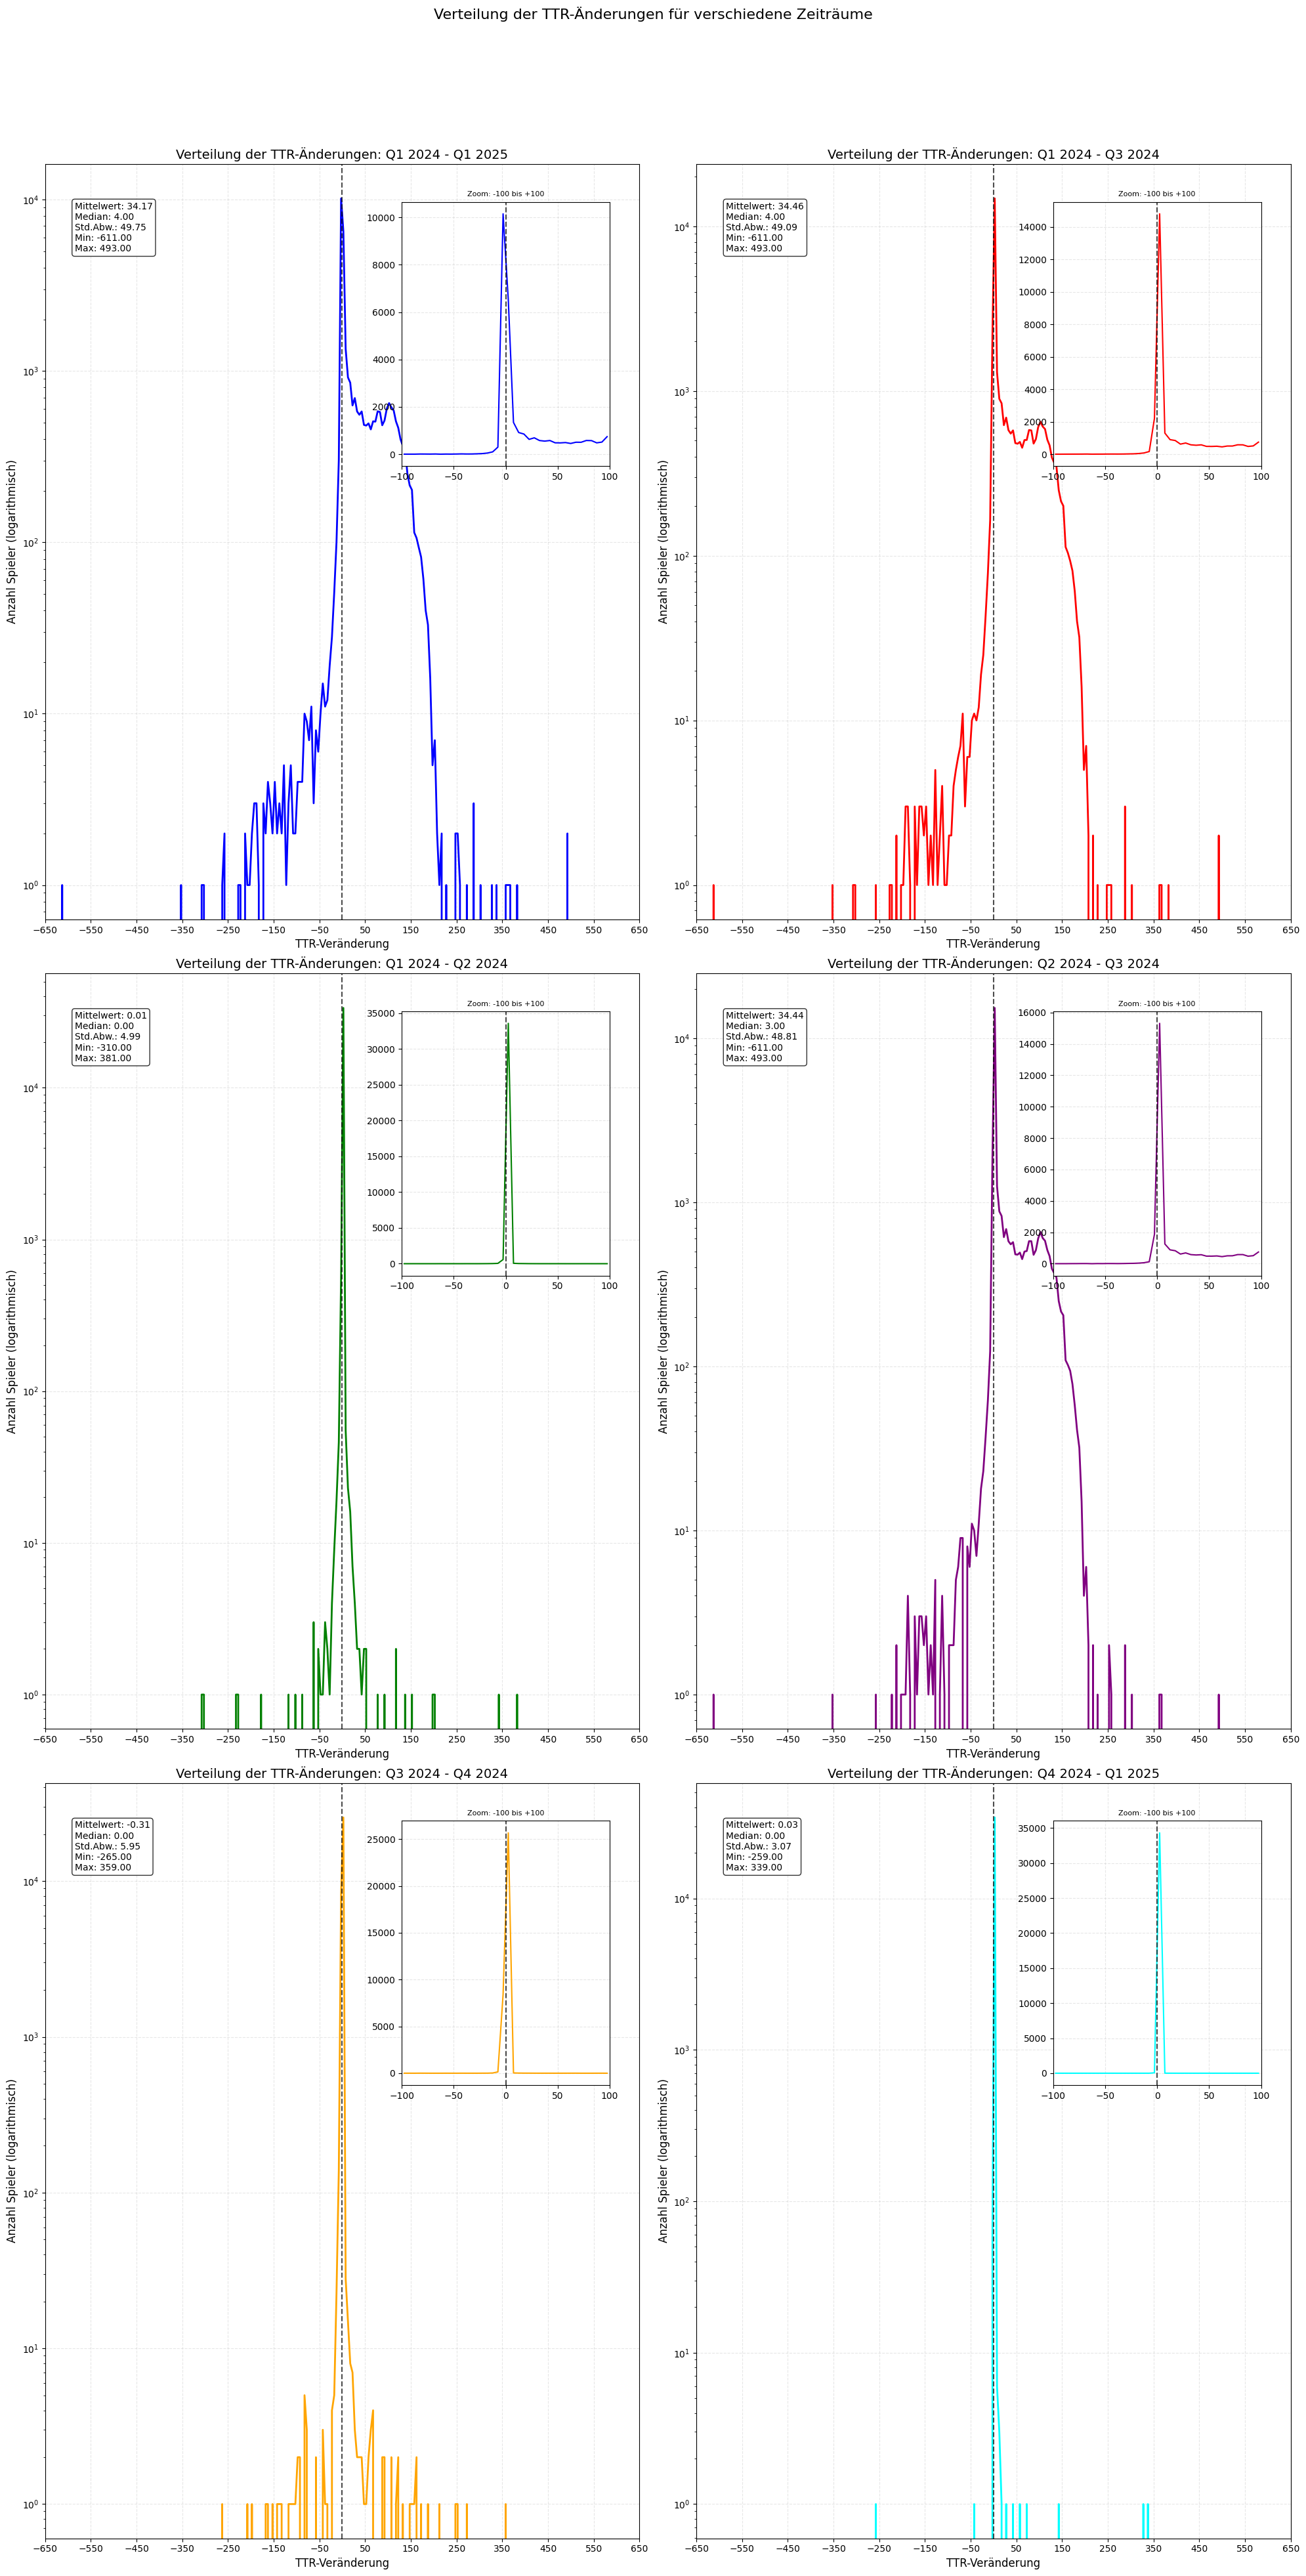

In [11]:
########################################################
#---------- Linechart der QTTR Veränderungen ----------#
########################################################

# Erstellen einer Figur mit 6 Subplots (2 Zeilen, 3 Spalten)
fig, axes = plt.subplots(3, 2, figsize=(20, 40))
axes = axes.flatten()  # Macht aus dem 2D-Array eine flache Liste

# Definition des Bins-Bereichs für alle Histogramme
bin_range = (-650, 650)
bin_width = 5  # 5-Punkte-Schritte für feinere Auflösung
bins = np.arange(bin_range[0], bin_range[1] + bin_width, bin_width)

# Farben für die verschiedenen Zeiträume
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']

# Für jeden Zeitraum ein separates Liniendiagramm erstellen
for i, (col, label, color) in enumerate(zip(columns, labels, colors)):
    # Daten für diese Spalte
    data = TTR_Entwicklung_inport[col].dropna()
    
    # Histogram berechnen
    hist, bin_edges = np.histogram(data, bins=bins)
    
    # Binmitte berechnen für das Liniendiagramm
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Logarithmische Y-Achse für diesen Subplot
    axes[i].set_yscale('log')
    
    # Liniendiagramm zeichnen
    axes[i].plot(bin_centers, hist, color=color, linewidth=2)
    
    # Vertikale Linie bei 0 hinzufügen
    axes[i].axvline(x=0, color='black', linestyle='--', alpha=0.7)
    
    # Beschriftungen hinzufügen
    axes[i].set_title(f'Verteilung der TTR-Änderungen: {label}', fontsize=14)
    axes[i].set_xlabel('TTR-Veränderung', fontsize=12)
    axes[i].set_ylabel('Anzahl Spieler (logarithmisch)', fontsize=12)
    
    # X-Achsen-Limit setzen
    axes[i].set_xlim(bin_range)
    
    # Gitterlinien für bessere Lesbarkeit
    axes[i].grid(True, linestyle='--', alpha=0.3)
    
    # X-Achsenticks im 100er-Abstand
    xticks = np.arange(bin_range[0], bin_range[1] + 1, 100)
    axes[i].set_xticks(xticks)
    
    # Statistik im Plot anzeigen
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    max_val = data.max()
    min_val = data.min()
    
    stats_text = (
        f'Mittelwert: {mean_val:.2f}\n'
        f'Median: {median_val:.2f}\n'
        f'Std.Abw.: {std_val:.2f}\n'
        f'Min: {min_val:.2f}\n'
        f'Max: {max_val:.2f}'
    )
    
    axes[i].text(0.05, 0.95, stats_text,
                transform=axes[i].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Zusätzlich einen Inset-Plot für den Bereich um 0 herum
    inset_ax = axes[i].inset_axes([0.6, 0.6, 0.35, 0.35])
    
    # Engerer Bereich für den Inset-Plot
    central_range = (-100, 100)
    central_bins = np.arange(central_range[0], central_range[1] + bin_width, bin_width)
    
    # Histogram für den zentralen Bereich
    central_hist, central_edges = np.histogram(data, bins=central_bins)
    central_centers = (central_edges[:-1] + central_edges[1:]) / 2
    
    # Inset-Plot zeichnen (mit normaler Y-Achse für bessere Sichtbarkeit)
    inset_ax.plot(central_centers, central_hist, color=color, linewidth=1.5)
    inset_ax.axvline(x=0, color='black', linestyle='--', alpha=0.7)
    inset_ax.set_title('Zoom: -100 bis +100', fontsize=8)
    inset_ax.set_xlim(central_range)
    inset_ax.grid(True, linestyle='--', alpha=0.3)

# Einen gemeinsamen Titel für die ganze Figur
plt.suptitle('Verteilung der TTR-Änderungen für verschiedene Zeiträume', fontsize=16, y=0.98)

# Layout optimieren
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Platz für den Haupttitel

# Plot anzeigen
plt.show()

# Optional: Speichern der Grafik
# plt.savefig('ttr_veraenderungen_getrennt.png', dpi=300, bbox_inches='tight')

### Untersuchen der extrem großen Veränderungen

In [4]:
# Die TTR-Differenz-Spalten
diff_columns = [
    'Q-TTR_dif_24_Q1-25_Q1',
    'Q-TTR_dif_24_Q1-24_Q3',
    'Q-TTR_dif_24_Q1-24_Q2',
    'Q-TTR_dif_24_Q2-24_Q3',
    'Q-TTR_dif_24_Q3-24_Q4',
    'Q-TTR_dif_24_Q4-25_Q1'
]

# Erstellen eines Filters für Zeilen mit einem absoluten Wert größer als 400 in einer der diff_columns
filter_condition = False
for col in diff_columns:
    # Absolute Werte größer als 400 (sowohl positiv als auch negativ)
    filter_condition = filter_condition | (TTR_Entwicklung_inport[col].abs() > 400)

# Filtern des DataFrames und Speichern in einem neuen DataFrame
grosse_differenzen_df = TTR_Entwicklung_inport[filter_condition].copy()

# Sortieren nach der größten absoluten Differenz (in der ersten Spalte)
grosse_differenzen_df = grosse_differenzen_df.sort_values(by=diff_columns[0], ascending=False)

# Ausgabe der Anzahl der gefundenen Zeilen
print(f"Anzahl Spieler mit TTR-Differenz > 400: {len(grosse_differenzen_df)}")

# Anzeigen der ersten paar Zeilen
print(grosse_differenzen_df[['Nachname', 'Vorname', 'Nation'] + diff_columns].head(10))

# Optional: Speichern in CSV-Datei
# grosse_differenzen_df.to_csv("ttr_differenzen_groesser_400.csv", index=False)

Anzahl Spieler mit TTR-Differenz > 400: 3
       Nachname      Vorname Nation  Q-TTR_dif_24_Q1-25_Q1  \
14776       Kim       Haneul    KOR                  493.0   
32351  Petersen        Mieke    GER                  493.0   
15402    Ulrich  Numa Marlon    SUI                 -611.0   

       Q-TTR_dif_24_Q1-24_Q3  Q-TTR_dif_24_Q1-24_Q2  Q-TTR_dif_24_Q2-24_Q3  \
14776                  493.0                  343.0                  150.0   
32351                  493.0                    0.0                  493.0   
15402                 -611.0                    0.0                 -611.0   

       Q-TTR_dif_24_Q3-24_Q4  Q-TTR_dif_24_Q4-25_Q1  
14776                    0.0                    0.0  
32351                    0.0                    0.0  
15402                    0.0                    0.0  


---

## **Key Statistiks**

In [4]:
QTTR_entwicklung_erweitert = pd.read_csv("/Users/fabi/Documents/BBA/6_Semester/Projekt_BBA/QTTR-Veraenderungen-Klemm/Data/processed_data/ttr_entwicklung_ohne_nall_erweitert.csv")

In [5]:
########################################################
#----------------- Key Statisitiks --------------------#
########################################################

# Die Spalten mit den TTR-Differenzen
diff_columns = [
    'Q-TTR_dif_24_Q1-25_Q1',
    'Q-TTR_dif_24_Q1-24_Q3',
    'Q-TTR_dif_24_Q1-24_Q2',
    'Q-TTR_dif_24_Q2-24_Q3',
    'Q-TTR_dif_24_Q3-24_Q4',
    'Q-TTR_dif_24_Q4-25_Q1'
]

# Lesbare Namen für die Spalten
column_labels = {
    'Q-TTR_dif_24_Q1-25_Q1': 'Q1 2024 - Q1 2025',
    'Q-TTR_dif_24_Q1-24_Q3': 'Q1 2024 - Q3 2024',
    'Q-TTR_dif_24_Q1-24_Q2': 'Q1 2024 - Q2 2024',
    'Q-TTR_dif_24_Q2-24_Q3': 'Q2 2024 - Q3 2024',
    'Q-TTR_dif_24_Q3-24_Q4': 'Q3 2024 - Q4 2024',
    'Q-TTR_dif_24_Q4-25_Q1': 'Q4 2024 - Q1 2025'
}

print("=" * 80)
print("STATISTISCHE AUSWERTUNG DER TTR-VERÄNDERUNGEN")
print("=" * 80)

# 1. Statistiken nach Geschlecht
print("\n\n" + "=" * 30 + " VERGLEICH NACH GESCHLECHT " + "=" * 30 + "\n")

# Liste für die Geschlechter
geschlechter = ['M', 'W']
geschlecht_labels = {'M': 'Männlich', 'W': 'Weiblich'}

for geschlecht in geschlechter:
    print(f"\n{geschlecht_labels[geschlecht]} (Anzahl: {len(QTTR_entwicklung_erweitert[QTTR_entwicklung_erweitert['Geschlecht'] == geschlecht])})")
    print("-" * 80)
    
    for col in diff_columns:
        data = QTTR_entwicklung_erweitert[QTTR_entwicklung_erweitert['Geschlecht'] == geschlecht][col].dropna()
        
        # Statistiken berechnen
        stats = {
            'Anzahl': len(data),
            'Mittelwert': data.mean(),
            'Median': data.median(),
            'Std.Abweichung': data.std(),
            'Min': data.min(),
            'Max': data.max(),
            'Q25': data.quantile(0.25),
            'Q75': data.quantile(0.75)
        }
        
        print(f"\n{column_labels[col]}:")
        print(f"  Anzahl Spieler: {stats['Anzahl']}")
        print(f"  Mittelwert: {stats['Mittelwert']:.2f}, Median: {stats['Median']:.2f}")
        print(f"  Standardabweichung: {stats['Std.Abweichung']:.2f}")
        print(f"  Min: {stats['Min']:.2f}, Max: {stats['Max']:.2f}")
        print(f"  25%-Quantil: {stats['Q25']:.2f}, 75%-Quantil: {stats['Q75']:.2f}")

# 2. Statistiken nach Verband (Ausland vs. Deutschland)
print("\n\n" + "=" * 30 + " VERGLEICH NACH HERKUNFT " + "=" * 30 + "\n")

# Erstelle eine neue Spalte für die Gruppe (Ausland vs. Deutschland)
QTTR_entwicklung_erweitert['Herkunft'] = QTTR_entwicklung_erweitert['Verband'].apply(
    lambda x: 'Ausland' if x == 'Ausland' else 'Deutschland' if pd.notna(x) else 'Unbekannt'
)

# Liste für die Gruppen
herkunft_gruppen = ['Ausland', 'Deutschland']

for herkunft in herkunft_gruppen:
    print(f"\n{herkunft} (Anzahl: {len(QTTR_entwicklung_erweitert[QTTR_entwicklung_erweitert['Herkunft'] == herkunft])})")
    print("-" * 80)
    
    for col in diff_columns:
        data = QTTR_entwicklung_erweitert[QTTR_entwicklung_erweitert['Herkunft'] == herkunft][col].dropna()
        
        # Statistiken berechnen
        stats = {
            'Anzahl': len(data),
            'Mittelwert': data.mean(),
            'Median': data.median(),
            'Std.Abweichung': data.std(),
            'Min': data.min(),
            'Max': data.max(),
            'Q25': data.quantile(0.25),
            'Q75': data.quantile(0.75)
        }
        
        print(f"\n{column_labels[col]}:")
        print(f"  Anzahl Spieler: {stats['Anzahl']}")
        print(f"  Mittelwert: {stats['Mittelwert']:.2f}, Median: {stats['Median']:.2f}")
        print(f"  Standardabweichung: {stats['Std.Abweichung']:.2f}")
        print(f"  Min: {stats['Min']:.2f}, Max: {stats['Max']:.2f}")
        print(f"  25%-Quantil: {stats['Q25']:.2f}, 75%-Quantil: {stats['Q75']:.2f}")

print("\n" + "=" * 80)

STATISTISCHE AUSWERTUNG DER TTR-VERÄNDERUNGEN


============================== VERGLEICH NACH GESCHLECHT ==============================


Männlich (Anzahl: 24281)
--------------------------------------------------------------------------------

Q1 2024 - Q1 2025:
  Anzahl Spieler: 24281
  Mittelwert: 27.27, Median: 1.00
  Standardabweichung: 46.61
  Min: -611.00, Max: 381.00
  25%-Quantil: -1.00, 75%-Quantil: 47.00

Q1 2024 - Q3 2024:
  Anzahl Spieler: 24281
  Mittelwert: 27.53, Median: 1.00
  Standardabweichung: 45.88
  Min: -611.00, Max: 381.00
  25%-Quantil: 0.00, 75%-Quantil: 47.00

Q1 2024 - Q2 2024:
  Anzahl Spieler: 24281
  Mittelwert: 0.01, Median: 0.00
  Standardabweichung: 4.40
  Min: -310.00, Max: 381.00
  25%-Quantil: 0.00, 75%-Quantil: 0.00

Q2 2024 - Q3 2024:
  Anzahl Spieler: 24281
  Mittelwert: 27.53, Median: 1.00
  Standardabweichung: 45.68
  Min: -611.00, Max: 366.00
  25%-Quantil: 0.00, 75%-Quantil: 47.00

Q3 2024 - Q4 2024:
  Anzahl Spieler: 24281
  Mittelwert: -0.3